In [91]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import matplotlib.pyplot as plt 

%matplotlib inline

In [32]:
cv = 10
n_jobs = 2

# creating dataset
digits = load_digits()
X = digits.data
Y = digits.target
print(X.shape, Y.shape)

(1797, 64) (1797,)


In [56]:
Y.size

1797

__Запись файла__

In [103]:
def write(n=0, *args):
    with open(f'file{n}.txt', 'w') as file:
        file.write(' '.join(list(map(str, args))))

__Отрисовка кривой__

In [67]:
def plot_curve(x1=None, y1=None, x2=None, y2=None, label1=None, label2=None):
    if x1 is None and x2 is None:
        x1, x2 = np.arange(0, y1.size, 1), np.arange(0, y1.size, 1)
    plt.plot(x1, y1, 'g-', marker='o', label=label1 or 'first')
    plt.plot(x2, y2, 'r-', marker='o', label=label2 or 'second')
    plt.ylim((0, 1.02))
    plt.legend()
    plt.grid()
    plt.show()
    
def plot_curves(labels, y, x=None):
    if x is None:
        x_ = np.arange(0, y[0].size, 1)
        for y_, label_ in zip(y, labels):
            plt.plot(x_, y_, marker='o', label=label_)
    else:
        for x_, y_, label_ in zip(x, y, labels):
            plt.plot(x_, y_, marker='o', label=label_)
    plt.ylim((0, 1.02))
    plt.grid()
    plt.legend()
    plt.show()

__Задание номер 1.__ 

In [36]:
estimator = DecisionTreeClassifier()

In [37]:
# check parameter 'n_jobs' time management 
for i in range(1, 3):
    %time score = cross_val_score(estimator, X, Y, cv=10, n_jobs=3).mean()
    print(f'{score}')

CPU times: user 47.2 ms, sys: 16.2 ms, total: 63.3 ms
Wall time: 224 ms
0.8391601480666635
CPU times: user 39.9 ms, sys: 3.85 ms, total: 43.8 ms
Wall time: 204 ms
0.8197261491930121


In [38]:
%%time
answer1 = cross_val_score(estimator, X, Y, cv=10, n_jobs=n_jobs) 
write(1, answer1.mean())
answer1.mean()

CPU times: user 38.5 ms, sys: 5.72 ms, total: 44.2 ms
Wall time: 1.99 s


0.837993437891616

__Задание номер 2.__ 

In [39]:
%%time
classifier = BaggingClassifier(base_estimator=estimator, n_estimators=100)
answer2 = cross_val_score(classifier, X, Y, cv=cv, n_jobs=n_jobs)
write(2, answer2.mean())
answer2.mean()

CPU times: user 67.4 ms, sys: 8.43 ms, total: 75.8 ms
Wall time: 8.58 s


0.9243413688238167

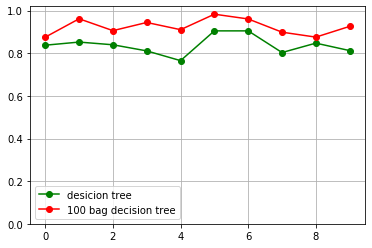

In [54]:
plot_curve(y1=answer1, y2=answer2, label1='desicion tree', label2=f'{100} bag decision tree')

__Задание номер 3.__ 

In [57]:
%%time
classifier = BaggingClassifier(base_estimator=estimator, max_features=int(np.sqrt(X.shape[1])), n_estimators=100, random_state=0)
answer3 = cross_val_score(classifier, X, Y, cv=cv, n_jobs=n_jobs)
write(3, answer3.mean())
answer3.mean()

CPU times: user 72.2 ms, sys: 48.8 ms, total: 121 ms
Wall time: 5.39 s


0.9365281294303756

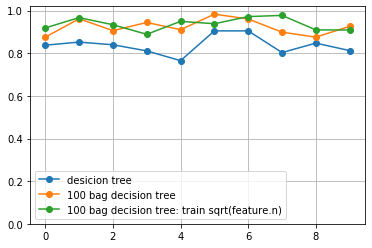

In [68]:
plot_curves(['desicion tree', f'{100} bag decision tree', f'{100} bag decision tree: train sqrt(feature.n)'], [answer1, answer2, answer3])

__Задание номер 4.__ 

In [83]:
%%time
estimator = DecisionTreeClassifier(max_features='sqrt')
classifier = BaggingClassifier(base_estimator=estimator, n_estimators=100, random_state=0)
answer4 = cross_val_score(classifier, X, Y, cv=cv, n_jobs=n_jobs)
write(4, answer4.mean())
answer4.mean()

CPU times: user 58.6 ms, sys: 8.53 ms, total: 67.1 ms
Wall time: 2.26 s


0.9544773623165452

__Задание номер 5.__ 

In [104]:
write(5, *[2, 3, 4, 7])

In [84]:
%%time
classifier = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=0)
answer5 = cross_val_score(classifier, X, Y, cv=cv, n_jobs=n_jobs)
answer5.mean()

CPU times: user 65 ms, sys: 8.13 ms, total: 73.1 ms
Wall time: 2.17 s


0.9506154156838471

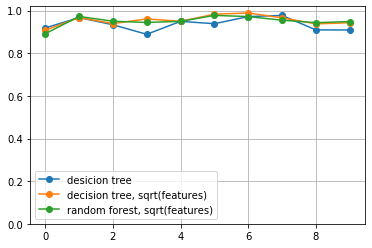

In [85]:
plot_curves(['desicion tree', f'decision tree, sqrt(features)', f'random forest, sqrt(features)'], [answer3, answer4, answer5])

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=int(np.sqrt(Y.size)))

In [95]:
%%time
classifier = RandomForestClassifier()
param_grid = {
    'n_estimators': [1, 2, 3, 5, 10, 20, 40, 50, 70, 80, 100],
    'max_depth': [2, 3, 5, 7, 10, None],
    'max_features': ['sqrt', 'log2', None, 0.25, 0.5, 0.75]
}
grid_cv = RandomizedSearchCV(estimator=classifier, param_distributions=param_grid, n_iter=20, cv=3, random_state=0, n_jobs=n_jobs)
grid_cv.fit(X_train, Y_train)

/Users/macair/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 910 ms, sys: 54.4 ms, total: 965 ms
Wall time: 6.2 s


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [96]:
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'n_estimators': 100, 'max_features': 0.5, 'max_depth': 10}
0.9652421652421652


In [114]:
grid_cv.cv_results_

{'mean_fit_time': array([0.02030174, 0.00952419, 0.59946791, 0.25807635, 0.02573872,
        0.10489853, 0.04832403, 0.05045215, 0.72631097, 0.2862707 ,
        0.01722082, 0.09439143, 0.13406308, 0.08755207, 0.09384735,
        0.00361109, 0.00289305, 0.04690933, 0.04412166, 0.00715232]),
 'std_fit_time': array([2.05822709e-04, 7.59469584e-04, 3.24334444e-02, 1.17829535e-02,
        2.92698078e-04, 5.85508658e-03, 1.30050130e-03, 5.77904745e-04,
        1.04447455e-02, 1.07828677e-03, 3.97885553e-04, 2.10293444e-03,
        1.56371067e-03, 4.88755218e-04, 5.14992922e-03, 8.58547477e-05,
        2.38476932e-04, 3.51846752e-04, 1.79445954e-03, 7.31213367e-05]),
 'mean_score_time': array([0.00182199, 0.0011851 , 0.01838144, 0.01640256, 0.00228771,
        0.00297737, 0.00194565, 0.00375001, 0.01730466, 0.0073452 ,
        0.00139896, 0.01094238, 0.01487406, 0.00788005, 0.00898457,
        0.00113471, 0.00098554, 0.00161862, 0.00422136, 0.00104499]),
 'std_score_time': array([8.14289330e-

In [120]:
res = grid_cv.cv_results_
# keys = ['params', rank_test_]
for key in map(lambda i: f'split{i}_test_score', range(3)): 
    ind = np.argmin(res[key]), np.argmax(res[key])
    print(ind)

(15, 2)
(15, 2)
(15, 2)
